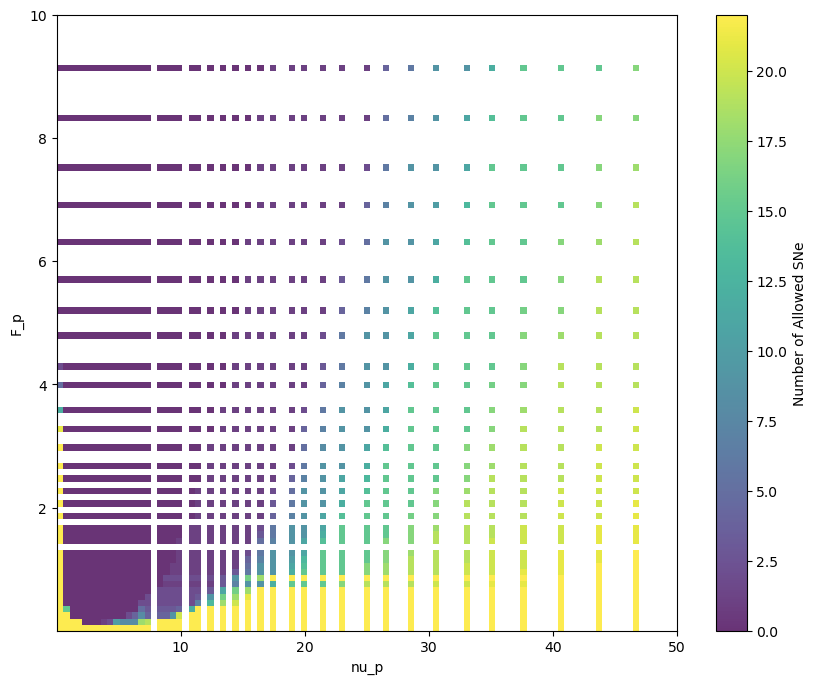

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import matplotlib.colors as mcolors

def process_file(file_name):
    """
    Reads a file, filters data based on conditions, and returns F_p, nu_p, and RuledOut status.
    """
    data = ascii.read(file_name)
    
    # Convert 'RuledOut' to boolean if needed
    if data['RuledOut'].dtype.type is np.str_:
        ruled_out = data['RuledOut'] == 'True'
    else:
        ruled_out = data['RuledOut']
    
    # Extract F_p and nu_p values
    F_peak = data['F_peak']
    nu_peak = data['nu_peak']
    
    return F_peak, nu_peak, ruled_out

# Process all files (replace with actual filenames in your case) 22 SN
file_names = ['PS11ad.csv', 'PS12cht.csv', 'PS10acl.csv', 'PS11jf.csv', 'PS12zc.csv','PS11jk.csv', 
              'PS12kn.csv', 'PS13byi.csv','PS12car.csv','PS13cvy.csv','PS13epy.csv','PS11aqj.csv',
              'PS12bub.csv','PS10cdq.csv','PS12apa.csv','PS12bli.csv','PS12dm.csv','PS12gy.csv',
              'PS12ces.csv','PS13adh.csv','PS13epq.csv','PS13ecp.csv']
results = [process_file(file) for file in file_names]

# Define bins for F_p and nu_p
F_p_bins = np.linspace(min(min(result[0]) for result in results), max(max(result[0]) for result in results), num=100)
nu_p_bins = np.linspace(min(min(result[1]) for result in results), max(max(result[1]) for result in results), num=100)

# Initialize arrays to store the count of allowed SNs and the total data points in each bin
allowed_counts = np.zeros((len(F_p_bins) - 1, len(nu_p_bins) - 1))  # Count of allowed SNs
total_counts = np.zeros((len(F_p_bins) - 1, len(nu_p_bins) - 1))    # Count of total SNs (allowed + ruled out)

# Process each file's data
for F_peak, nu_peak, ruled_out in results:
    # Bin the F_p and nu_p values
    F_p_indices = np.digitize(F_peak, bins=F_p_bins) - 1  # Subtract 1 for zero-based indexing
    nu_p_indices = np.digitize(nu_peak, bins=nu_p_bins) - 1  # Subtract 1 for zero-based indexing
    
    # Update counts for each bin
    for i in range(len(F_peak)):
        if 0 <= F_p_indices[i] < len(F_p_bins) - 1 and 0 <= nu_p_indices[i] < len(nu_p_bins) - 1:
            total_counts[F_p_indices[i], nu_p_indices[i]] += 1
            if not ruled_out[i]:
                allowed_counts[F_p_indices[i], nu_p_indices[i]] += 1

# Create a mask for empty bins
empty_space_mask = total_counts == 0

# Create a combined array for imshow
combined_array = np.where(empty_space_mask, np.nan, np.where(allowed_counts == 0, 0, allowed_counts))

# Plotting the binned data
plt.figure(figsize=(10, 8))

# Create a custom colormap with a specific color for ruled-out bins
cmap = plt.cm.viridis
cmap.set_bad(color='white')  # Set NaN values to white

# Create a custom norm to map ruled-out bins to a specific color
norm = mcolors.Normalize(vmin=0, vmax=22)  # Map values 0-5 to the viridis colormap

# Plot the combined array with the custom colormap
im = plt.imshow(
    combined_array,
    origin='lower',
    extent=[
        nu_p_bins[0], nu_p_bins[-1],  # Linear scale for nu_p (x-axis)
        F_p_bins[0], F_p_bins[-1]     # Linear scale for F_p (y-axis)
    ],
    cmap=cmap,
    aspect='auto',
    alpha=0.8,
    norm=norm
)

# Add colorbar for allowed regions
plt.colorbar(label='Number of Allowed SNe')

#cbar = plt.colorbar(im, label='Number of Allowed SNe')
#cbar.set_ticks([0, 1, 2, 3, 4, 5])
#cbar.set_ticklabels(['Ruled Out', 1, 2, 3, 4, 5])

# Labels and title
plt.xlabel('nu_p')
plt.ylabel('F_p')
#plt.title('Allowed, Ruled-Out, and Empty Parameter Space')
plt.show()


In [3]:
def process_file(file_name):
    """
    Reads a file, filters data based on conditions, and returns F_p, nu_p, and RuledOut status.
    """
    data = ascii.read(file_name)
    
    # Convert 'RuledOut' to boolean if needed
    if data['RuledOut'].dtype.type is np.str_:
        ruled_out = data['RuledOut'] == 'True'
    else:
        ruled_out = data['RuledOut']
    
    # Extract F_p and nu_p values
    F_peak = data['F_peak']
    nu_peak = data['nu_peak']
    
    return F_peak, nu_peak, ruled_out


## An attempt to make the bins evenly distributed in the visualization

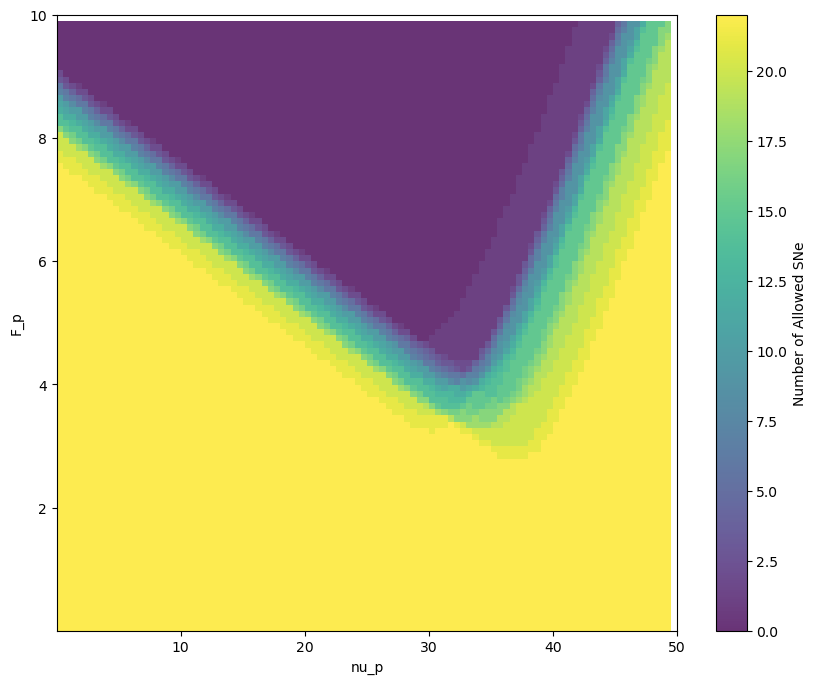

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import matplotlib.colors as mcolors

def process_file(file_name):
    """
    Reads a file, filters data based on conditions, and returns F_p, nu_p, and RuledOut status.
    """
    data = ascii.read(file_name)
   
    # Convert 'RuledOut' to boolean if needed
    if data['RuledOut'].dtype.type is np.str_:
        ruled_out = data['RuledOut'] == 'True'  # True if ruled out, False if not
    else:
        ruled_out = data['RuledOut']
    
    # Apply the mask to filter F_peak and nu_peak
    F_peak = data['F_peak']
    nu_peak = data['nu_peak']
    
    return F_peak, nu_peak, ruled_out

# Process all files (replace with actual filenames in your case)
file_names = ['PS11ad.csv', 'PS12cht.csv', 'PS10acl.csv', 'PS11jf.csv', 'PS12zc.csv','PS11jk.csv', 
              'PS12kn.csv', 'PS13byi.csv','PS12car.csv','PS13cvy.csv','PS13epy.csv','PS11aqj.csv',
              'PS12bub.csv','PS10cdq.csv','PS12apa.csv','PS12bli.csv','PS12dm.csv','PS12gy.csv',
              'PS12ces.csv','PS13adh.csv','PS13epq.csv','PS13ecp.csv']
results = [process_file(file) for file in file_names]

# Define bins for F_p and nu_p
F_p_bins = np.logspace(np.log10(0.001), np.log10(10.0), num=100)
nu_p_bins = np.logspace(np.log10(0.05), np.log10(50), num=100)

# To make the bins evenly spaced in logarithmic scale
F_p_bin_edges = np.logspace(np.log10(0.001), np.log10(10.0), num=101)
nu_p_bin_edges = np.logspace(np.log10(0.05), np.log10(50), num=101)

# Initialize arrays to store the count of allowed SNs and the total data points in each bin
allowed_counts = np.zeros((len(F_p_bin_edges) - 1, len(nu_p_bin_edges) - 1))  # Count of allowed SNs
total_counts = np.zeros((len(F_p_bin_edges) - 1, len(nu_p_bin_edges) - 1))    # Count of total SNs (allowed + ruled out)

# Process each file's data
for F_peak, nu_peak, ruled_out in results:
    # Bin the F_p and nu_p values
    F_p_indices = np.digitize(F_peak, bins=F_p_bins) - 1  # Subtract 1 for zero-based indexing
    nu_p_indices = np.digitize(nu_peak, bins=nu_p_bins) - 1  # Subtract 1 for zero-based indexing
    
    # Update counts for each bin
    for i in range(len(F_peak)):
        if 0 <= F_p_indices[i] < len(F_p_bins) - 1 and 0 <= nu_p_indices[i] < len(nu_p_bins) - 1:
            total_counts[F_p_indices[i], nu_p_indices[i]] += 1
            if not ruled_out[i]:
                allowed_counts[F_p_indices[i], nu_p_indices[i]] += 1

# Create a mask for empty bins
empty_space_mask = total_counts == 0

# Create a combined array for imshow
combined_array = np.where(empty_space_mask, np.nan, np.where(allowed_counts == 0, 0, allowed_counts))

# Plotting the binned data
plt.figure(figsize=(10, 8))

# Create a custom colormap with a specific color for ruled-out bins
cmap = plt.cm.viridis
cmap.set_bad(color='white')  # Set NaN values to white

# Create a custom norm to map ruled-out bins to a specific color
norm = mcolors.Normalize(vmin=0, vmax=22)  # Map values 0-5 to the viridis colormap

# Plot the combined array with the custom colormap
im = plt.imshow(
    combined_array,
    origin='lower',
    extent=[
        nu_p_bins[0], nu_p_bins[-1],  # Linear scale for nu_p (x-axis)
        F_p_bins[0], F_p_bins[-1]     # Linear scale for F_p (y-axis)
    ],
    cmap=cmap,
    aspect='auto',
    alpha=0.8,
    norm=norm
)

# Add colorbar for allowed regions
plt.colorbar(label='Number of Allowed SNe')

#cbar = plt.colorbar(im, label='Number of Allowed SNe')
#cbar.set_ticks([0, 1, 2, 3, 4, 5])
#cbar.set_ticklabels(['Ruled Out', 1, 2, 3, 4, 5])

# Labels and title
plt.xlabel('nu_p')
plt.ylabel('F_p')
#plt.title('Allowed, Ruled-Out, and Empty Parameter Space')
plt.show()


## Radius Vs density plot

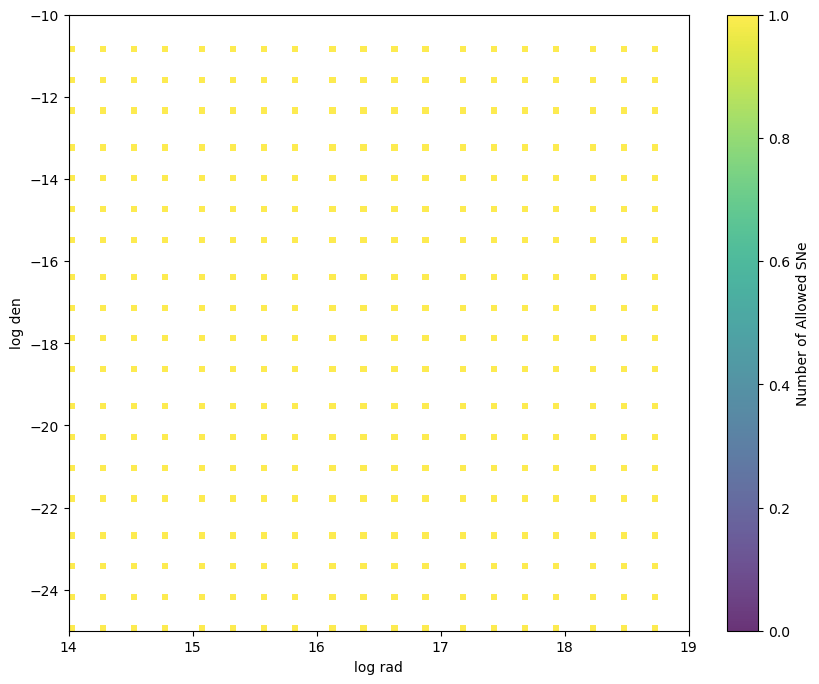

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import matplotlib.colors as mcolors

def process_raden_file(file_name):
    """
    Reads a file, filters data based on conditions, and returns rad, den, and RuledOut status.
    """
    data = ascii.read(file_name)
    
    # Convert 'RuledOut' to boolean if needed
    if data['RuledOut'].dtype.type is np.str_:
        ruled_out = data['RuledOut'] == 'True'  # True if ruled out, False if not
    else:
        ruled_out = data['RuledOut']
    

    # Apply the mask to filter rad and den
    rad = data['Radius']
    den = data['den']
    
    return rad, den, ruled_out

# Process all files (replace with actual filenames in your case)
file_names = ['PS11ad_rd.csv']#, 'PS12cht.csv', 'PS10acl.csv', 'PS11jf.csv', 'PS12zc.csv']
#file_names = ['PS11ad.csv', 'PS12cht.csv', 'PS10acl.csv', 'PS11jf.csv', 'PS12zc.csv','PS11jk.csv', 
#              'PS12kn.csv', 'PS13byi.csv','PS12car.csv','PS13cvy.csv','PS13epy.csv','PS11aqj.csv',
#              'PS12bub.csv','PS10cdq.csv','PS12apa.csv','PS12bli.csv','PS12dm.csv','PS12gy.csv',
#              'PS12ces.csv','PS13adh.csv','PS13epq.csv','PS13ecp.csv']
results = [process_raden_file(file) for file in file_names]

# Define bins for rad and den
rad_bins = np.logspace(np.log10(min(min(result[0]) for result in results)), np.log10(max(max(result[0]) for result in results)), num=100)
den_bins = np.logspace(np.log10(min(min(result[1]) for result in results)), np.log10(max(max(result[1]) for result in results)), num=100)

# To make the bins evenly spaced in logarithmic scale
rad_bin_edges = np.logspace(np.log10(min(min(result[0]) for result in results)), np.log10(max(max(result[0]) for result in results)), num=101)
den_bin_edges = np.logspace(np.log10(min(min(result[1]) for result in results)), np.log10(max(max(result[1]) for result in results)), num=101)

# Initialize arrays to store the count of allowed SNs and the total data points in each bin
rad_allowed_counts = np.zeros((len(rad_bin_edges) - 1, len(den_bin_edges) - 1))  # Count of allowed SNs
rad_total_counts = np.zeros((len(rad_bin_edges) - 1, len(den_bin_edges) - 1))    # Count of total SNs (allowed + ruled out)

# Process each file's data
for rad, den, ruled_out in results:
    # Bin the log10 values of rad and den
    log_rad = np.log10(rad)
    log_den = np.log10(den)
    
    rad_indices = np.digitize(log_rad, bins=np.log10(rad_bin_edges)) - 1  # Subtract 1 for zero-based indexing
    den_indices = np.digitize(log_den, bins=np.log10(den_bin_edges)) - 1  # Subtract 1 for zero-based indexing
    
    # Update counts for each bin
    for i in range(len(rad)):
        if 0 <= rad_indices[i] < len(rad_bin_edges) - 1 and 0 <= den_indices[i] < len(den_bin_edges) - 1:
            rad_total_counts[rad_indices[i], den_indices[i]] += 1
            if not ruled_out[i]:
                rad_allowed_counts[rad_indices[i], den_indices[i]] += 1

# Create a mask for empty bins
rad_empty_space_mask = rad_total_counts == 0

# Create a combined array for imshow
rad_combined_array = np.where(rad_empty_space_mask, np.nan, np.where(rad_allowed_counts == 0, 0, rad_allowed_counts))

# Plotting the binned data
plt.figure(figsize=(10, 8))

# Create a custom colormap with a specific color for ruled-out bins
cmap = plt.cm.viridis
cmap.set_bad(color='white')  # Set NaN values to white

# Create a custom norm to map ruled-out bins to a specific color
norm = mcolors.Normalize(vmin=0, vmax=1)  # Map values 0-5 to the viridis colormap

# Plot the combined array with the custom colormap
im = plt.imshow(
    rad_combined_array,
    origin='lower',
    extent=[
        np.log10(rad_bin_edges[0]), np.log10(rad_bin_edges[-1]),  # Log10 scale for rad (x-axis)
        np.log10(den_bin_edges[0]), np.log10(den_bin_edges[-1])     # Log10 scale for den (y-axis)
    ],
    cmap=cmap,
    aspect='auto',
    alpha=0.8,
    norm=norm
)

# Add colorbar for allowed regions
plt.colorbar(label='Number of Allowed SNe')

#cbar = plt.colorbar(im, label='Number of Allowed SNe')
#cbar.set_ticks([0, 1, 2, 3,4,5])
#cbar.set_ticklabels(['Ruled Out', 1, 2, 3, 4, 5])

plt.xlabel('log rad')
plt.ylabel('log den')


#axs[1].set_xscale('log')
#axs[1].set_yscale('log')

plt.show()

## testing the radius and density data to know why there seem to be an overlap

<Figure size 1000x700 with 0 Axes>

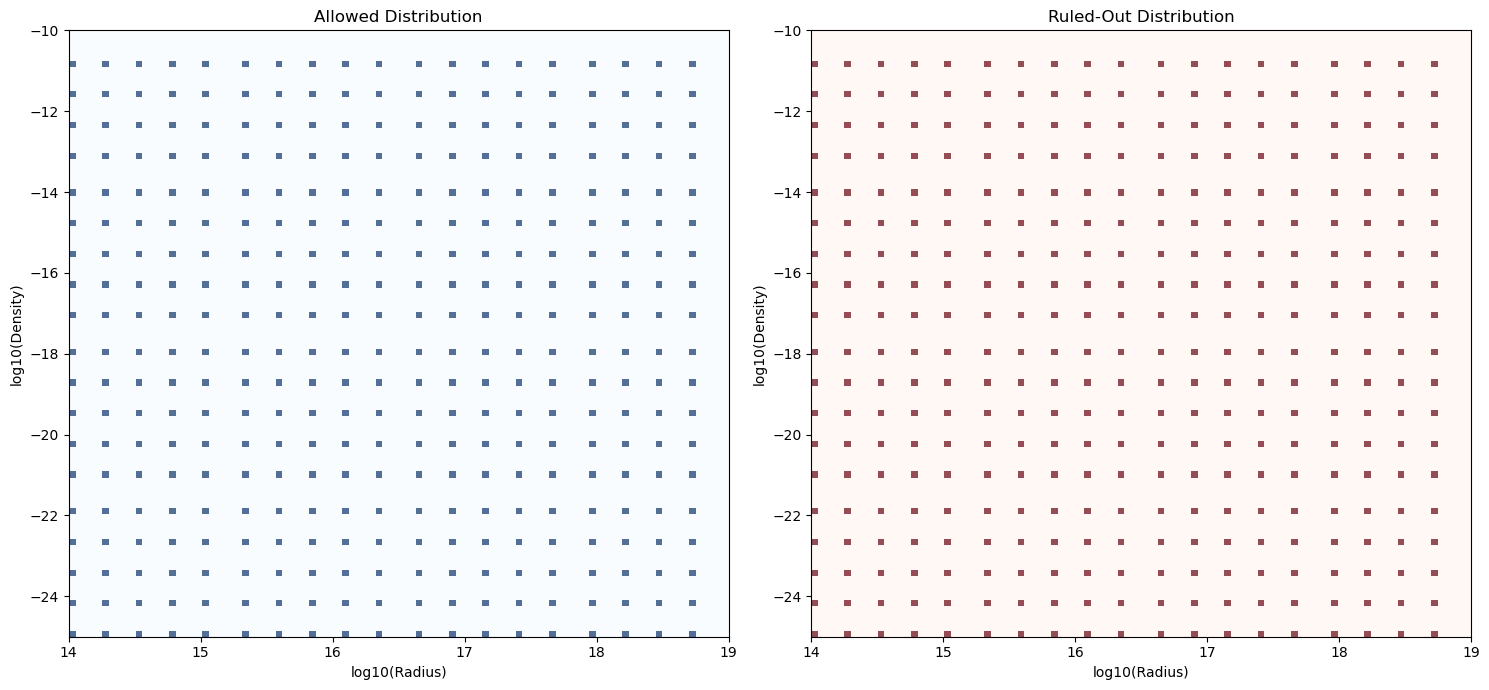

In [44]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt

def process_raden_file(file_name):
    """
    Reads a file and returns allowed and ruled-out rad, den values.
    A row is allowed if F_peak > 0 and RuledOut == 'False'.
    """
    data = ascii.read(file_name)

    # Convert F_peak to float and normalize RuledOut
    f_peak = data['F_peak'].astype(float)
    nu_peak = data['nu_peak'].astype(float)

    # Allowed condition
    allowed_mask = (f_peak > 0) & (nu_peak > 0) & (data['RuledOut'] == 'False')
    ruled_out_mask = ~allowed_mask

    allowed_rad = data['Radius'][allowed_mask]
    allowed_den = data['den'][allowed_mask]

    ruled_out_rad = data['Radius'][ruled_out_mask]
    ruled_out_den = data['den'][ruled_out_mask]

    return allowed_rad, allowed_den, ruled_out_rad, ruled_out_den


# ---------- MAIN ANALYSIS AND PLOTTING ----------

file_names = ['PS11ad_rd.csv']  # Add more files if needed
results = [process_raden_file(file) for file in file_names]

# Separate results
all_allowed_rad = np.concatenate([r[0] for r in results])
all_allowed_den = np.concatenate([r[1] for r in results])
all_ruled_out_rad = np.concatenate([r[2] for r in results])
all_ruled_out_den = np.concatenate([r[3] for r in results])

# Define bins from both allowed and ruled-out data
rad_all = np.concatenate([all_allowed_rad, all_ruled_out_rad])
den_all = np.concatenate([all_allowed_den, all_ruled_out_den])

rad_bins = np.logspace(np.log10(np.min(rad_all)), np.log10(np.max(rad_all)), num=100)
den_bins = np.logspace(np.log10(np.min(den_all)), np.log10(np.max(den_all)), num=100)

# Initialize count grids
allowed_counts = np.zeros((len(rad_bins)-1, len(den_bins)-1))
ruled_out_counts = np.zeros((len(rad_bins)-1, len(den_bins)-1))

# Digitize and count allowed
log_rad_allowed = np.log10(all_allowed_rad)
log_den_allowed = np.log10(all_allowed_den)
rad_idx = np.digitize(log_rad_allowed, bins=np.log10(rad_bins)) - 1
den_idx = np.digitize(log_den_allowed, bins=np.log10(den_bins)) - 1

for i in range(len(log_rad_allowed)):
    if (0 <= rad_idx[i] < len(rad_bins)-1 and 
        0 <= den_idx[i] < len(den_bins)-1):
        allowed_counts[rad_idx[i], den_idx[i]] += 1

# Digitize and count ruled-out
log_rad_ruled = np.log10(all_ruled_out_rad)
log_den_ruled = np.log10(all_ruled_out_den)
rad_idx = np.digitize(log_rad_ruled, bins=np.log10(rad_bins)) - 1
den_idx = np.digitize(log_den_ruled, bins=np.log10(den_bins)) - 1

for i in range(len(log_rad_ruled)):
    if (0 <= rad_idx[i] < len(rad_bins)-1 and 
        0 <= den_idx[i] < len(den_bins)-1):
        ruled_out_counts[rad_idx[i], den_idx[i]] += 1

# ---------- PLOTTING ----------

plt.figure(figsize=(10, 7))

norm = mcolors.Normalize(vmin=0, vmax=1) 
# Plot allowed (blue)
# Plot allowed (blue)
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot allowed (blue)
ax[0].imshow(
    allowed_counts,
    origin='lower',
    extent=[
        np.log10(rad_bins[0]), np.log10(rad_bins[-1]),
        np.log10(den_bins[0]), np.log10(den_bins[-1])
    ],
    cmap=plt.cm.Blues,
    alpha=0.7,
    aspect='auto',
    norm=norm
)
ax[0].set_title('Allowed Distribution')
ax[0].set_xlabel('log10(Radius)')
ax[0].set_ylabel('log10(Density)')

# Plot ruled-out (red)
ax[1].imshow(
    ruled_out_counts,
    origin='lower',
    extent=[
        np.log10(rad_bins[0]), np.log10(rad_bins[-1]),
        np.log10(den_bins[0]), np.log10(den_bins[-1])
    ],
    cmap=plt.cm.Reds,
    alpha=0.7,
    aspect='auto',
    norm=norm
)
ax[1].set_title('Ruled-Out Distribution')
ax[1].set_xlabel('log10(Radius)')
ax[1].set_ylabel('log10(Density)')

plt.tight_layout()
plt.show()






In [114]:
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('PS11ad_rd.csv')

# Convert columns to appropriate types (if needed)
data['F_peak'] = pd.to_numeric(data['F_peak'], errors='coerce')
data['nu_peak'] = pd.to_numeric(data['nu_peak'], errors='coerce')

# Create masks for filtering
allowed_mask = (data['F_peak'] > -1) & (data['nu_peak'] > -1) & (data['RuledOut'] == False)
ruled_out_mask = (data['F_peak'] > -1) & (data['nu_peak'] > -1) & (data['RuledOut'] == True)

# Filter the data based on the masks
allowed_data = data[allowed_mask][['Radius', 'den']]
ruled_out_data = data[ruled_out_mask][['Radius', 'den']]

# Return the results
print("Allowed data (RuledOut=False):")
print(allowed_data)

print("\nRuled out data (RuledOut=True):")
print(ruled_out_data)

Allowed data (RuledOut=False):
              Radius           den
0       1.000000e+14  1.000000e-25
1       1.000000e+14  1.000000e-25
2       1.000000e+14  1.000000e-25
3       1.000000e+14  1.000000e-25
4       1.000000e+14  1.000000e-25
...              ...           ...
159995  1.000000e+19  1.000000e-10
159996  1.000000e+19  1.000000e-10
159997  1.000000e+19  1.000000e-10
159998  1.000000e+19  1.000000e-10
159999  1.000000e+19  1.000000e-10

[141200 rows x 2 columns]

Ruled out data (RuledOut=True):
              Radius           den
228     1.000000e+14  1.000000e-25
247     1.000000e+14  1.000000e-25
248     1.000000e+14  1.000000e-25
266     1.000000e+14  1.000000e-25
267     1.000000e+14  1.000000e-25
...              ...           ...
159983  1.000000e+19  1.000000e-10
159984  1.000000e+19  1.000000e-10
159985  1.000000e+19  1.000000e-10
159986  1.000000e+19  1.000000e-10
159987  1.000000e+19  1.000000e-10

[18800 rows x 2 columns]


In [115]:
# Find overlapping pairs (inner merge)
overlap = pd.merge(allowed_data, ruled_out_data, how='inner', on=['Radius', 'den'])
len(overlap)

6636400

In [116]:
# Find non-overlapping pairs
allowed_only = allowed_data.merge(ruled_out_data, on=['Radius', 'den'], how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
ruled_out_only = ruled_out_data.merge(allowed_data, on=['Radius', 'den'], how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

# Print results
print(f"Allowed-only points (not in ruled-out): {len(allowed_only)}")
print(allowed_only.head())  # Show first few rows

print(f"\nRuled-out-only points (not in allowed): {len(ruled_out_only)}")
print(ruled_out_only.head())


Allowed-only points (not in ruled-out): 0
Empty DataFrame
Columns: [Radius, den]
Index: []

Ruled-out-only points (not in allowed): 0
Empty DataFrame
Columns: [Radius, den]
Index: []


In [113]:
	F_peak	nu_peak	Radius	den	RuledOut
227	0.0009229566127930932	0.7329376577519712	100000000000000.0	1e-25	False
228	0.010879523064358321	2.3582282247109037	100000000000000.0	1e-25	False

SyntaxError: invalid syntax (351080819.py, line 1)

In [ ]:
	F_peak	nu_peak	Radius	den	RuledOut
227	0.0009229566127930932	0.7329376577519712	100000000000000.0	1e-25	False
228	0.010879523064358321	2.3582282247109037	100000000000000.0	1e-25	False